## Problem 2:

### Attribute Information:

1. Target: Claim Status (Claimed)
2. Code of tour firm (Agency_Code)
3. Type of tour insurance firms (Type)
4. Distribution channel of tour insurance agencies (Channel)
5. Name of the tour insurance products (Product)
6. Duration of the tour (Duration)
7. Destination of the tour (Destination)
8. Amount of sales of tour insurance policies (Sales)
9. The commission received for tour insurance firm (Commission)
10. Age of insured (Age)

### Importing all required Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

from scipy import stats

### 2.1 Data Ingestion: Read the dataset. Do the descriptive statistics and do null value condition check, write an inference on it.

### Loading the Data

In [163]:
df2 = pd.read_csv("insurance_part2_data-2 (1).csv")

# Checking the data

In [164]:
df2.head()

,Age,Agency_Code,Type,Claimed,Commision,Channel,Duration,Sales,Product Name,Destination
0,48,C2B,Airlines,No,0.70,Online,7,2.51,Customised Plan,ASIA
1,36,EPX,Travel Agency,No,0.00,Online,34,20.00,Customised Plan,ASIA
2,39,CWT,Travel Agency,No,5.94,Online,3,9.90,Customised Plan,Americas
3,36,EPX,Travel Agency,No,0.00,Online,4,26.00,Cancellation Plan,ASIA
4,33,JZI,Airlines,No,6.30,Online,53,18.00,Bronze Plan,ASIA


In [165]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Age           3000 non-null   int64  
 1   Agency_Code   3000 non-null   object 
 2   Type          3000 non-null   object 
 3   Claimed       3000 non-null   object 
 4   Commision     3000 non-null   float64
 5   Channel       3000 non-null   object 
 6   Duration      3000 non-null   int64  
 7   Sales         3000 non-null   float64
 8   Product Name  3000 non-null   object 
 9   Destination   3000 non-null   object 
dtypes: float64(2), int64(2), object(6)
memory usage: 234.5+ KB


# Check for missing value in any column

In [166]:
df2.isnull().sum().sum()

0

# Descriptive Statistics Summary

In [167]:
df2.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Age,3000.0,NaN,NaN,NaN,38.091000,10.463518,8.0,32.0,36.00,42.000,84.00
Agency_Code,3000,4,EPX,1365,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Type,3000,2,Travel Agency,1837,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Claimed,3000,2,No,2076,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Commision,3000.0,NaN,NaN,NaN,14.529203,25.481455,0.0,0.0,4.63,17.235,210.21
Channel,3000,2,Online,2954,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Duration,3000.0,NaN,NaN,NaN,70.001333,134.053313,-1.0,11.0,26.50,63.000,4580.00
Sales,3000.0,NaN,NaN,NaN,60.249913,70.733954,0.0,20.0,33.00,69.000,539.00
Product Name,3000,5,Customised Plan,1136,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Destination,3000,3,ASIA,2465,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Observation

    - duration has negative valu, it is not possible. Wrong entry.
    - Commision & Sales- mean and median varies signficantly
    

# Observation

Categorial code variable maximun unique count is 5

In [168]:
df2.head()

,Age,Agency_Code,Type,Claimed,Commision,Channel,Duration,Sales,Product Name,Destination
0,48,C2B,Airlines,No,0.70,Online,7,2.51,Customised Plan,ASIA
1,36,EPX,Travel Agency,No,0.00,Online,34,20.00,Customised Plan,ASIA
2,39,CWT,Travel Agency,No,5.94,Online,3,9.90,Customised Plan,Americas
3,36,EPX,Travel Agency,No,0.00,Online,4,26.00,Cancellation Plan,ASIA
4,33,JZI,Airlines,No,6.30,Online,53,18.00,Bronze Plan,ASIA


In [169]:
df2.tail()

,Age,Agency_Code,Type,Claimed,Commision,Channel,Duration,Sales,Product Name,Destination
2995,28,CWT,Travel Agency,Yes,166.53,Online,364,256.20,Gold Plan,Americas
2996,35,C2B,Airlines,No,13.50,Online,5,54.00,Gold Plan,ASIA
2997,36,EPX,Travel Agency,No,0.00,Online,54,28.00,Customised Plan,ASIA
2998,34,C2B,Airlines,Yes,7.64,Online,39,30.55,Bronze Plan,ASIA
2999,47,JZI,Airlines,No,11.55,Online,15,33.00,Bronze Plan,ASIA


In [170]:
df2.shape

(3000, 10)

## Geting the unique counts of all Nominal Variables

In [171]:
for column in df2[['Agency_Code', 'Type', 'Claimed', 'Channel', 
                  'Product Name', 'Destination']]:
    print(column.upper(),': ',df2[column].nunique())
    print(df2[column].value_counts().sort_values())
    print('\n')

AGENCY_CODE :  4
JZI     239
CWT     472
C2B     924
EPX    1365
Name: Agency_Code, dtype: int64


TYPE :  2
Airlines         1163
Travel Agency    1837
Name: Type, dtype: int64


CLAIMED :  2
Yes     924
No     2076
Name: Claimed, dtype: int64


CHANNEL :  2
Offline      46
Online     2954
Name: Channel, dtype: int64


PRODUCT NAME :  5
Gold Plan             109
Silver Plan           427
Bronze Plan           650
Cancellation Plan     678
Customised Plan      1136
Name: Product Name, dtype: int64


DESTINATION :  3
EUROPE       215
Americas     320
ASIA        2465
Name: Destination, dtype: int64




## Check for duplicate data

In [172]:
# Are there any duplicates ?
dups = df2.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))
df2[dups]

Number of duplicate rows = 139


,Age,Agency_Code,Type,Claimed,Commision,Channel,Duration,Sales,Product Name,Destination
63,30,C2B,Airlines,Yes,15.0,Online,27,60.0,Bronze Plan,ASIA
329,36,EPX,Travel Agency,No,0.0,Online,5,20.0,Customised Plan,ASIA
407,36,EPX,Travel Agency,No,0.0,Online,11,19.0,Cancellation Plan,ASIA
411,35,EPX,Travel Agency,No,0.0,Online,2,20.0,Customised Plan,ASIA
422,36,EPX,Travel Agency,No,0.0,Online,5,20.0,Customised Plan,ASIA
...,...,...,...,...,...,...,...,...,...,...
2940,36,EPX,Travel Agency,No,0.0,Online,8,10.0,Cancellation Plan,ASIA
2947,36,EPX,Travel Agency,No,0.0,Online,10,28.0,Customised Plan,ASIA
2952,36,EPX,Travel Agency,No,0.0,Online,2,10.0,Cancellation Plan,ASIA
2962,36,EPX,Travel Agency,No,0.0,Online,4,20.0,Customised Plan,ASIA


Though it shows there are 139 records, but it can be of different customers, there is no customer ID or any unique identifier, so not dropping them.

# Univariate Analysis

# Age variable

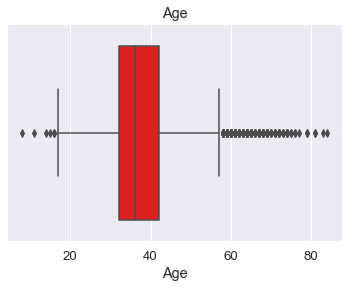

In [173]:
plt.title('Age')
sns.boxplot(df2['Age'],orient='horizondal',color='red')

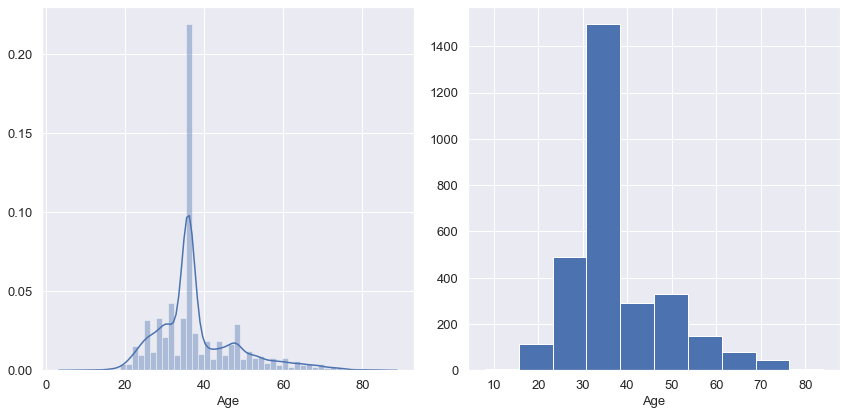

In [174]:
fig, (ax2,ax3)=plt.subplots(1,2,figsize=(12,6))

#distplot
sns.distplot(df2['Age'],ax=ax2)
ax2.set_xlabel('Age', fontsize=13)
ax2.tick_params(labelsize=13)

#histogram
ax3.hist(df2['Age'])
ax3.set_xlabel('Age', fontsize=13)
ax3.tick_params(labelsize=13)

plt.subplots_adjust(wspace=0.5)
plt.tight_layout()

# Commision variable

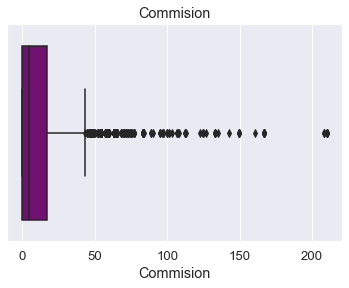

In [175]:
plt.title('Commision')
sns.boxplot(df2['Commision'],orient='horizondal',color='purple')

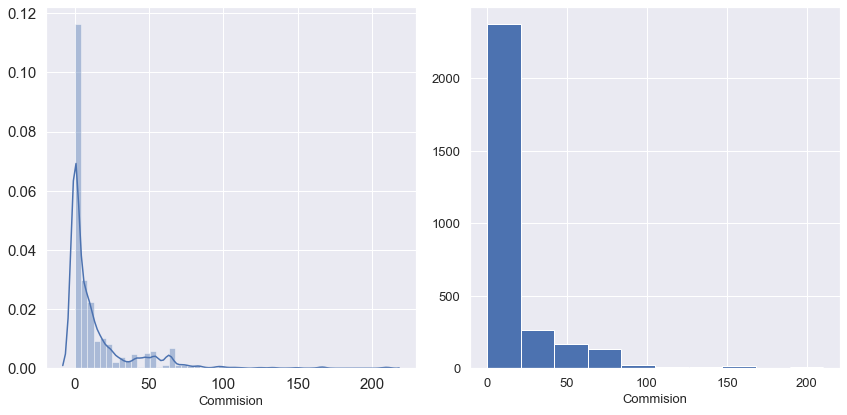

In [176]:
fig, (ax2,ax3)=plt.subplots(1,2,figsize=(12,6))

#distplot
sns.distplot(df2['Commision'],ax=ax2)
ax2.set_xlabel('Commision', fontsize=13)
ax2.tick_params(labelsize=15)

#histogram
ax3.hist(df2['Commision'])
ax3.set_xlabel('Commision', fontsize=13)
ax3.tick_params(labelsize=13)

plt.subplots_adjust(wspace=0.5)
plt.tight_layout()

# Duration variable

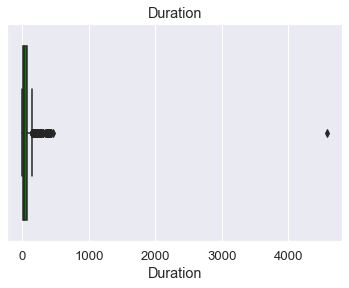

In [177]:
plt.title('Duration')
sns.boxplot(df2['Duration'],orient='horizondal',color='green')

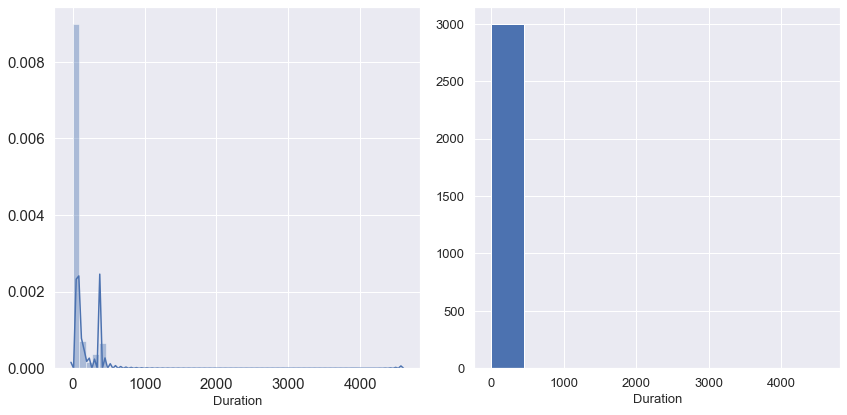

In [178]:
fig, (ax2,ax3)=plt.subplots(1,2,figsize=(12,6))

#distplot
sns.distplot(df2['Duration'],ax=ax2)
ax2.set_xlabel('Duration', fontsize=13)
ax2.tick_params(labelsize=15)

#histogram
ax3.hist(df2['Duration'])
ax3.set_xlabel('Duration', fontsize=13)
ax3.tick_params(labelsize=13)

plt.subplots_adjust(wspace=0.5)
plt.tight_layout()

# Sales variable

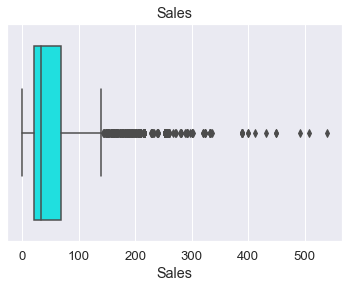

In [179]:
plt.title('Sales')
sns.boxplot(df2['Sales'],orient='horizondal',color='cyan')

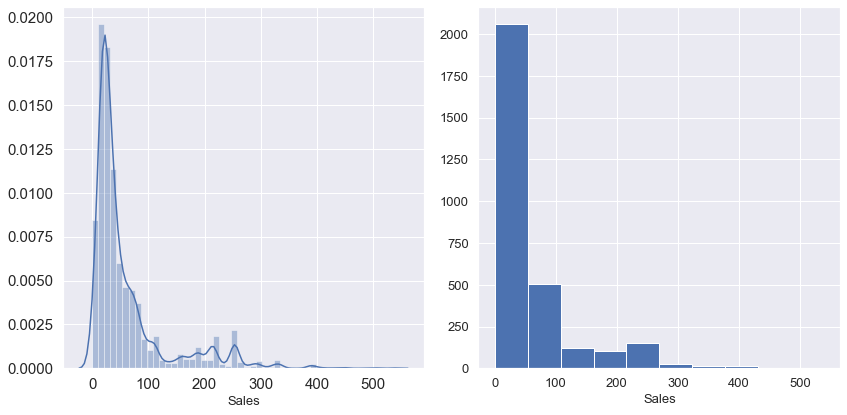

In [180]:
fig, (ax2,ax3)=plt.subplots(1,2,figsize=(12,6))

#distplot
sns.distplot(df2['Sales'],ax=ax2)
ax2.set_xlabel('Sales', fontsize=13)
ax2.tick_params(labelsize=15)

#histogram
ax3.hist(df2['Sales'])
ax3.set_xlabel('Sales', fontsize=13)
ax3.tick_params(labelsize=13)

plt.subplots_adjust(wspace=0.5)
plt.tight_layout()

There are outliers in all the variables, but the sales and commision can be a geneuine business valuee. Random Forest and CART can handle the outliers. Hence, Outliers are not treated for now, we will keep the data as it is. 


we will treat the outliers for the ANN model to compare the same after the all the steps just for comparsion.

# Categorical Variables 

# Agency_Code

##### Count Plot

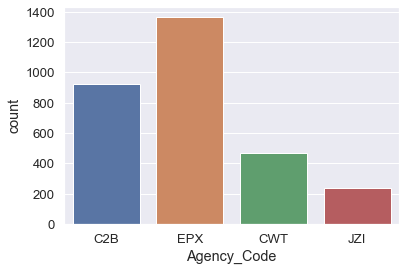

In [181]:
sns.countplot(data = df2, x = 'Agency_Code')

##### Boxplot

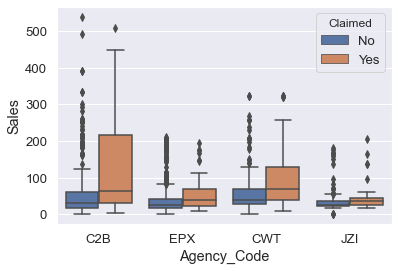

In [182]:
sns.boxplot(data = df2, x='Agency_Code',y='Sales', hue='Claimed')

##### Swarmplot

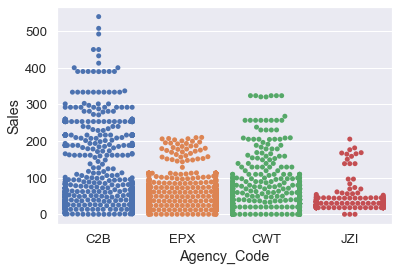

In [114]:
sns.swarmplot(data = df2, x='Agency_Code',y='Sales')

# Type

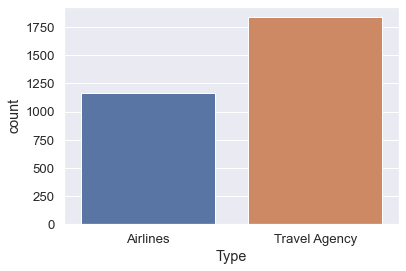

In [183]:
sns.countplot(data = df2, x = 'Type')

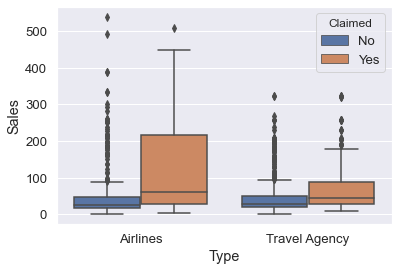

In [184]:
sns.boxplot(data = df2, x='Type',y='Sales', hue='Claimed')

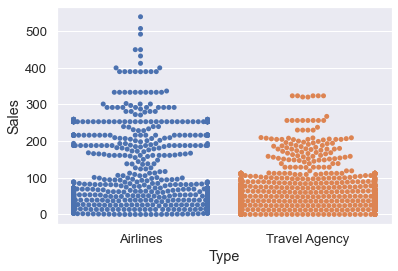

In [117]:
sns.swarmplot(data = df2, x='Type',y='Sales')

# Channel

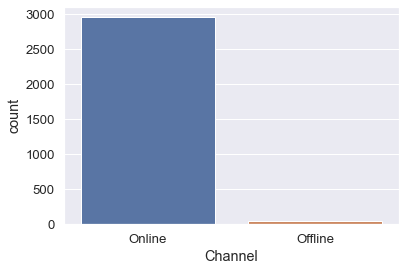

In [185]:
sns.countplot(data = df2, x = 'Channel')

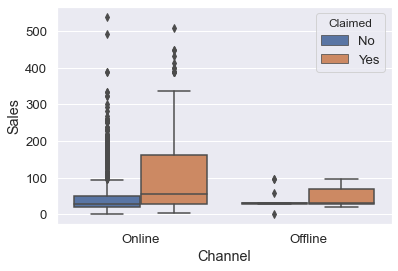

In [119]:
sns.boxplot(data = df2, x='Channel',y='Sales', hue='Claimed')

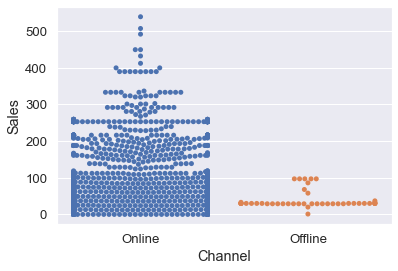

In [120]:
sns.swarmplot(data = df2, x='Channel',y='Sales')

# Product Name

In [314]:
sns.countplot(data = df2, x = 'Product Name', orient = 'v')

ValueError: Could not interpret input 'Product Name'

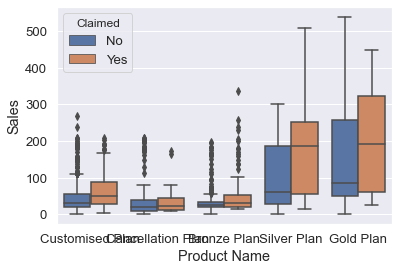

In [122]:
sns.boxplot(data = df2, x='Product Name',y='Sales', hue='Claimed')

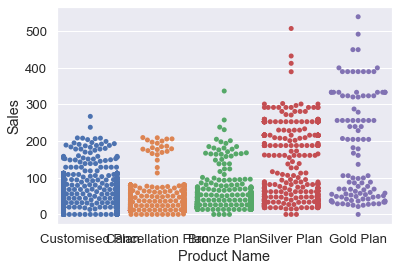

In [123]:
sns.swarmplot(data = df2, x='Product Name',y='Sales')

# Destination

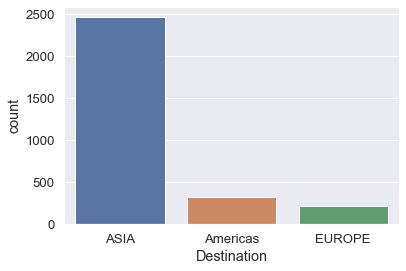

In [187]:
sns.countplot(data = df2, x = 'Destination')

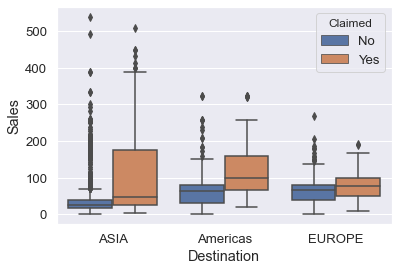

In [188]:
sns.boxplot(data = df2, x='Destination',y='Sales', hue='Claimed')

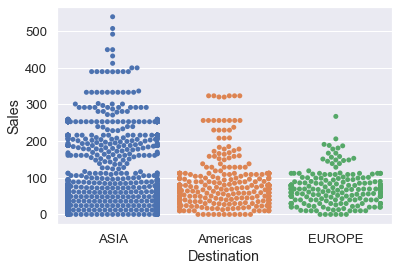

In [126]:
sns.swarmplot(data = df2, x='Destination',y='Sales')

# Checking pairwise distribution of the continuous variables

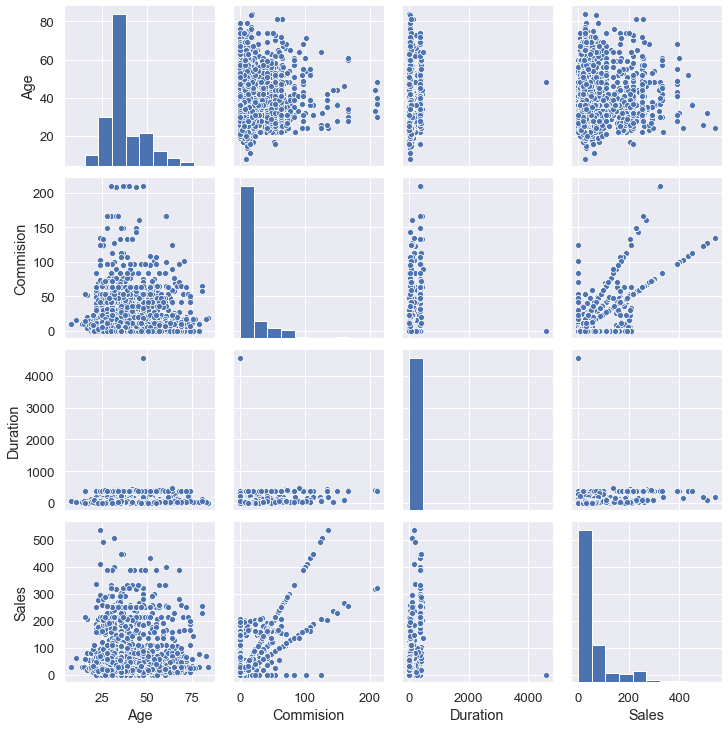

In [189]:
sns.pairplot(df2[['Age', 'Commision', 
    'Duration', 'Sales']])

# Checking for Correlations

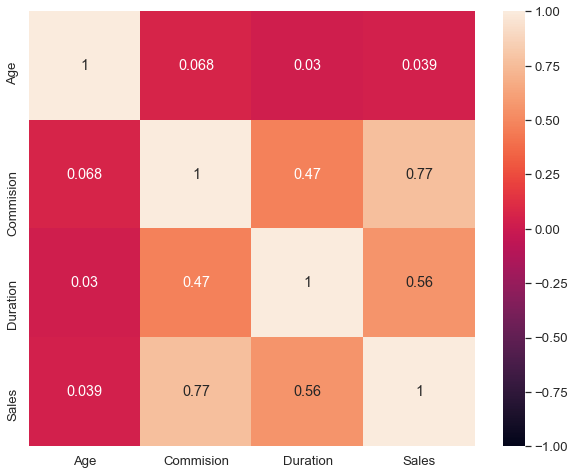

In [190]:
# construct heatmap with only continuous variables
plt.figure(figsize=(10,8))
sns.set(font_scale=1.2)
sns.heatmap(df2[['Age', 'Commision', 
    'Duration', 'Sales']].corr(), annot=True, vmin='-1', vmax='1')

# Converting all objects to categorical codes

In [191]:
for feature in df2.columns: 
    if df2[feature].dtype == 'object': 
        print('\n')
        print('feature:',feature)
        print(pd.Categorical(df2[feature].unique()))
        print(pd.Categorical(df2[feature].unique()).codes)
        df2[feature] = pd.Categorical(df2[feature]).codes



feature: Agency_Code
['C2B', 'EPX', 'CWT', 'JZI']
Categories (4, object): ['C2B', 'CWT', 'EPX', 'JZI']
[0 2 1 3]


feature: Type
['Airlines', 'Travel Agency']
Categories (2, object): ['Airlines', 'Travel Agency']
[0 1]


feature: Claimed
['No', 'Yes']
Categories (2, object): ['No', 'Yes']
[0 1]


feature: Channel
['Online', 'Offline']
Categories (2, object): ['Offline', 'Online']
[1 0]


feature: Product Name
['Customised Plan', 'Cancellation Plan', 'Bronze Plan', 'Silver Plan', 'Gold Plan']
Categories (5, object): ['Bronze Plan', 'Cancellation Plan', 'Customised Plan', 'Gold Plan', 'Silver Plan']
[2 1 0 4 3]


feature: Destination
['ASIA', 'Americas', 'EUROPE']
Categories (3, object): ['ASIA', 'Americas', 'EUROPE']
[0 1 2]


In [192]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Age           3000 non-null   int64  
 1   Agency_Code   3000 non-null   int8   
 2   Type          3000 non-null   int8   
 3   Claimed       3000 non-null   int8   
 4   Commision     3000 non-null   float64
 5   Channel       3000 non-null   int8   
 6   Duration      3000 non-null   int64  
 7   Sales         3000 non-null   float64
 8   Product Name  3000 non-null   int8   
 9   Destination   3000 non-null   int8   
dtypes: float64(2), int64(2), int8(6)
memory usage: 111.5 KB


In [193]:
df2.head()

,Age,Agency_Code,Type,Claimed,Commision,Channel,Duration,Sales,Product Name,Destination
0,48,0,0,0,0.70,1,7,2.51,2,0
1,36,2,1,0,0.00,1,34,20.00,2,0
2,39,1,1,0,5.94,1,3,9.90,2,1
3,36,2,1,0,0.00,1,4,26.00,1,0
4,33,3,0,0,6.30,1,53,18.00,0,0


In [194]:
df3 = df2.copy()

In [195]:
df4 = df3.copy()

In [196]:
df2=df2.drop(["Agency_Code"],axis=1)

In [197]:
df2.head()

,Age,Type,Claimed,Commision,Channel,Duration,Sales,Product Name,Destination
0,48,0,0,0.70,1,7,2.51,2,0
1,36,1,0,0.00,1,34,20.00,2,0
2,39,1,0,5.94,1,3,9.90,2,1
3,36,1,0,0.00,1,4,26.00,1,0
4,33,0,0,6.30,1,53,18.00,0,0


# Proportion of 1s and 0s

In [198]:
df2.Claimed.value_counts(normalize=True)

0    0.692
1    0.308
Name: Claimed, dtype: float64

0    0.692
1    0.308
Name: Claimed, dtype: float64


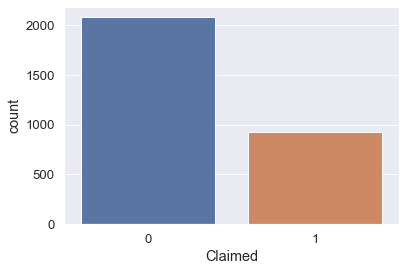

In [199]:
sns.countplot(x='Claimed',data=df2)
print(df2.Claimed.value_counts(normalize=True))

# 2.2 Data Split: Split the data into test and train, build classification model CART, Random Forest, Artificial Neural Network

# Extracting the target column into separate vectors for training set and test set

In [200]:
from sklearn.model_selection import train_test_split

In [201]:
X = df2.drop("Claimed", axis=1)

y = df2.pop("Claimed")

X.head()

,Age,Type,Commision,Channel,Duration,Sales,Product Name,Destination
0,48,0,0.70,1,7,2.51,2,0
1,36,1,0.00,1,34,20.00,2,0
2,39,1,5.94,1,3,9.90,2,1
3,36,1,0.00,1,4,26.00,1,0
4,33,0,6.30,1,53,18.00,0,0


# Splitting data into training and test set

In [202]:
#split data into 70% training and 30% test data
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size= 0.30, random_state=10)

# Checking the dimensions of the training and test data

In [203]:
print('X_train',X_train.shape)
print('X_test',X_test.shape)
print('y_train',y_train.shape)
print('y_test',y_test.shape)

X_train (2100, 8)
X_test (900, 8)
y_train (2100,)
y_test (900,)


# Building a Decision Tree Classifier

In [239]:
param_grid = {
    'criterion': ['gini'],
    'max_depth': [10, 20, 30, 50],
    'min_samples_leaf': [20, 30, 50], 
    'min_samples_split': [30, 50, 90],
}

dtcl = DecisionTreeClassifier(random_state=1)

grid_search = GridSearchCV(estimator = dtcl, param_grid = param_grid, cv = 10)

In [240]:
grid_search.fit(X_train, y_train)
print(grid_search.best_params_)
best_grid = grid_search.best_estimator_
best_grid
#{'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 50, 'min_samples_split': 450}

{'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 50, 'min_samples_split': 30}


DecisionTreeClassifier(max_depth=10, min_samples_leaf=50, min_samples_split=30,
                       random_state=1)

In [241]:
train_char_label = ['no', 'yes']
tree_regularized = open('tree_regularized.dot','w')
dot_data = tree.export_graphviz(best_grid, out_file= tree_regularized , feature_names = list(X_train), class_names = list(train_char_label))

tree_regularized.close()
dot_data

http://webgraphviz.com/

In [242]:
print (pd.DataFrame(best_grid.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values('Imp',ascending=False))

                   Imp
Product Name  0.551988
Commision     0.214407
Sales         0.188602
Duration      0.018501
Destination   0.014939
Age           0.007259
Type          0.004304
Channel       0.000000


In [243]:
ytrain_predict = best_grid.predict(X_train)
ytest_predict = best_grid.predict(X_test)

In [244]:
dt_model=DecisionTreeClassifier(criterion = 'gini') #entropy

In [245]:
ytest_predict
ytest_predict_prob=best_grid.predict_proba(X_test)
ytest_predict_prob
pd.DataFrame(ytest_predict_prob).head()

,0,1
0,0.545455,0.454545
1,1.000000,0.000000
2,0.462963,0.537037
3,0.348315,0.651685
4,0.392857,0.607143


AUC: 0.837


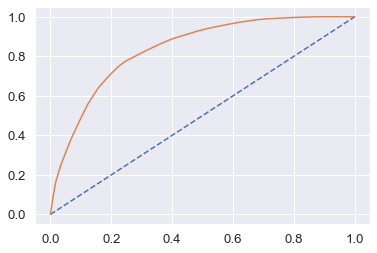

In [246]:
# predict probabilities
probs = best_grid.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
cart_train_auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % cart_train_auc)
# calculate roc curve
cart_train_fpr, cart_train_tpr, cart_train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(cart_train_fpr, cart_train_tpr)

AUC: 0.806


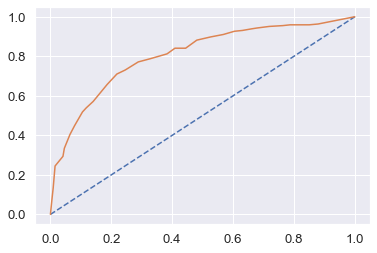

In [247]:
# predict probabilities
probs = best_grid.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
cart_test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % cart_test_auc)
# calculate roc curve
cart_test_fpr, cart_test_tpr, cart_testthresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(cart_test_fpr, cart_test_tpr)

In [248]:
confusion_matrix(y_train, ytrain_predict)

array([[1197,  224],
       [ 244,  435]], dtype=int64)

In [249]:
#Train Data Accuracy
cart_train_acc=best_grid.score(X_train,y_train) 
cart_train_acc

0.7771428571428571

In [250]:
print(classification_report(y_train, ytrain_predict))

              precision    recall  f1-score   support

           0       0.83      0.84      0.84      1421
           1       0.66      0.64      0.65       679

    accuracy                           0.78      2100
   macro avg       0.75      0.74      0.74      2100
weighted avg       0.78      0.78      0.78      2100



In [251]:
cart_metrics=classification_report(y_train, ytrain_predict,output_dict=True)
df3=pd.DataFrame(cart_metrics).transpose()
cart_train_f1=round(df3.loc["1"][2],2)
cart_train_recall=round(df3.loc["1"][1],2)
cart_train_precision=round(df3.loc["1"][0],2)
print ('cart_train_precision ',cart_train_precision)
print ('cart_train_recall ',cart_train_recall)
print ('cart_train_f1 ',cart_train_f1)

cart_train_precision  0.66
cart_train_recall  0.64
cart_train_f1  0.65


In [252]:
confusion_matrix(y_test, ytest_predict)

array([[563,  92],
       [105, 140]], dtype=int64)

In [253]:
#Test Data Accuracy
cart_test_acc=best_grid.score(X_test,y_test)
cart_test_acc

0.7811111111111111

In [254]:
print(classification_report(y_test, ytest_predict))

              precision    recall  f1-score   support

           0       0.84      0.86      0.85       655
           1       0.60      0.57      0.59       245

    accuracy                           0.78       900
   macro avg       0.72      0.72      0.72       900
weighted avg       0.78      0.78      0.78       900



In [255]:
cart_metrics=classification_report(y_test, ytest_predict,output_dict=True)
df3=pd.DataFrame(cart_metrics).transpose()
cart_test_precision=round(df3.loc["1"][0],2)
cart_test_recall=round(df3.loc["1"][1],2)
cart_test_f1=round(df3.loc["1"][2],2)
print ('cart_test_precision ',cart_test_precision)
print ('cart_test_recall ',cart_test_recall)
print ('cart_test_f1 ',cart_test_f1)

cart_test_precision  0.6
cart_test_recall  0.57
cart_test_f1  0.59


# Cart Conclusion

<b>Train Data:</b>  
    AUC: 85%        
    Accuracy: 78%             
    Precision: 68%        
    f1-Score: 66%       
            
<b>Test Data:</b>      
    AUC: 79.6%      
    Accuracy: 79%         
    Precision: 63%       
    f1-Score: 60%     
  
Training  results are higher than Test, and with the iterations this is the best CART model .  
  
Claim is the most important variable in predicting Insurance process.

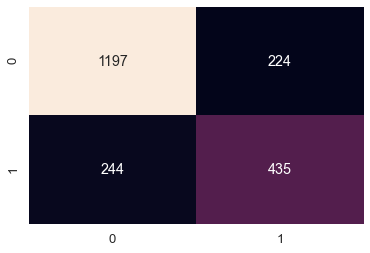

In [256]:
sns.heatmap(confusion_matrix(y_train,ytrain_predict),annot=True,fmt='d',cbar=False)

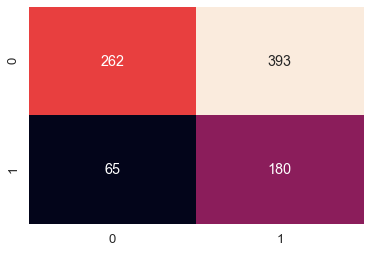

In [412]:
sns.heatmap(confusion_matrix(y_test,ytest_predict),annot=True,fmt='d',cbar=False)

# Building a Random Forest Classifier

In [258]:
### Grid Search for finding out the optimal values for the hyper parameters

In [268]:
param_grid = {
    'max_depth': [6, 7],
    'max_features': [4, 5],
    'min_samples_leaf': [25, 30],
    'min_samples_split': [20, 30], 
    'n_estimators': [101, 301] ## 100,200
}

rfcl = RandomForestClassifier(random_state=1)

grid_search = GridSearchCV(estimator = rfcl, param_grid = param_grid, cv = 5)

In [277]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=1),
             param_grid={'max_depth': [6, 7], 'max_features': [4, 5],
                         'min_samples_leaf': [25, 30],
                         'min_samples_split': [20, 30],
                         'n_estimators': [101, 301]})

In [278]:
grid_search.best_params_

{'max_depth': 6,
 'max_features': 5,
 'min_samples_leaf': 25,
 'min_samples_split': 20,
 'n_estimators': 101}

In [279]:
best_grid = grid_search.best_estimator_

In [280]:
best_grid

RandomForestClassifier(max_depth=6, max_features=5, min_samples_leaf=25,
                       min_samples_split=20, n_estimators=101, random_state=1)

In [281]:
ytrain_predict = best_grid.predict(X_train)
ytest_predict = best_grid.predict(X_test)

In [282]:
confusion_matrix(y_train,ytrain_predict)

array([[1260,  161],
       [ 292,  387]], dtype=int64)

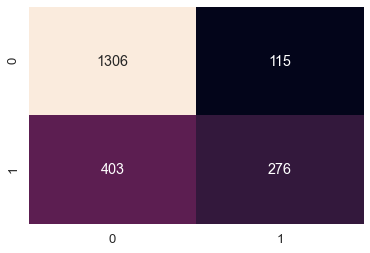

In [411]:
sns.heatmap(confusion_matrix(y_train,ytrain_predict),annot=True,fmt='d',cbar=False)

In [283]:
rf_train_acc=best_grid.score(X_train,y_train) 
rf_train_acc

0.7842857142857143

In [284]:
print(classification_report(y_train,ytrain_predict))

              precision    recall  f1-score   support

           0       0.81      0.89      0.85      1421
           1       0.71      0.57      0.63       679

    accuracy                           0.78      2100
   macro avg       0.76      0.73      0.74      2100
weighted avg       0.78      0.78      0.78      2100



In [285]:
rf_metrics=classification_report(y_train, ytrain_predict,output_dict=True)
df2=pd.DataFrame(rf_metrics).transpose()
rf_train_precision=round(df2.loc["1"][0],2)
rf_train_recall=round(df2.loc["1"][1],2)
rf_train_f1=round(df2.loc["1"][2],2)
print ('rf_train_precision ',rf_train_precision)
print ('rf_train_recall ',rf_train_recall)
print ('rf_train_f1 ',rf_train_f1)

rf_train_precision  0.71
rf_train_recall  0.57
rf_train_f1  0.63


Area under Curve is 0.8436553942078584


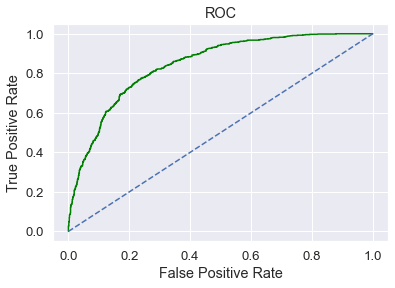

In [286]:
rf_train_fpr, rf_train_tpr,_=roc_curve(y_train,best_grid.predict_proba(X_train)[:,1])
plt.plot(rf_train_fpr,rf_train_tpr,color='green')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
rf_train_auc=roc_auc_score(y_train,best_grid.predict_proba(X_train)[:,1])
print('Area under Curve is', rf_train_auc)

In [287]:
confusion_matrix(y_test,ytest_predict)

array([[596,  59],
       [123, 122]], dtype=int64)

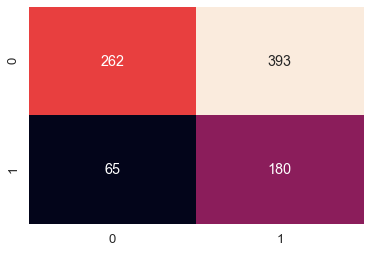

In [413]:
sns.heatmap(confusion_matrix(y_test,ytest_predict),annot=True,fmt='d',cbar=False)

In [288]:
rf_test_acc=best_grid.score(X_test,y_test)
rf_test_acc

0.7977777777777778

In [289]:
print(classification_report(y_test,ytest_predict))

              precision    recall  f1-score   support

           0       0.83      0.91      0.87       655
           1       0.67      0.50      0.57       245

    accuracy                           0.80       900
   macro avg       0.75      0.70      0.72       900
weighted avg       0.79      0.80      0.79       900



In [290]:
rf_metrics=classification_report(y_test, ytest_predict,output_dict=True)
df2=pd.DataFrame(rf_metrics).transpose()
rf_test_precision=round(df2.loc["1"][0],2)
rf_test_recall=round(df2.loc["1"][1],2)
rf_test_f1=round(df2.loc["1"][2],2)
print ('rf_test_precision ',rf_test_precision)
print ('rf_test_recall ',rf_test_recall)
print ('rf_test_f1 ',rf_test_f1)

rf_test_precision  0.67
rf_test_recall  0.5
rf_test_f1  0.57


Area under Curve is 0.816108428104066


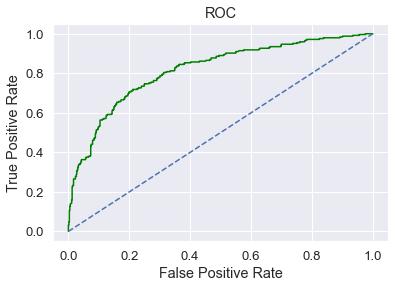

In [291]:
rf_test_fpr, rf_test_tpr,_=roc_curve(y_test,best_grid.predict_proba(X_test)[:,1])
plt.plot(rf_test_fpr,rf_test_tpr,color='green')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
rf_test_auc=roc_auc_score(y_test,best_grid.predict_proba(X_test)[:,1])
print('Area under Curve is', rf_test_auc)

In [292]:
# Variable Importance
print (pd.DataFrame(best_grid.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values('Imp',ascending=False))

                   Imp
Product Name  0.420537
Commision     0.227609
Sales         0.175810
Type          0.068122
Duration      0.056922
Age           0.038535
Destination   0.012464
Channel       0.000000


# Random Forest Conclusion

<b>Train Data:</b>  
    AUC: 84.4%        
    Accuracy: 78%           
    Precision: 71%        
    f1-Score: 63%       
            
<b>Test Data:</b>      
    AUC: 81.6%      
    Accuracy: 80%          
    Precision: 67%       
    f1-Score: 57%     
  
Training and Test set results are almost similar, and with the overall measures high, the model is a good model.  
  
Claim being the important varibale for predicting Insurance.

# Building a Neural Network Classifier

In [315]:
from sklearn.preprocessing import StandardScaler

In [316]:
sc = StandardScaler()

In [317]:
X_train = sc.fit_transform(X_train)

In [318]:
X_test

,Age,Type,Commision,Channel,Duration,Sales,Product Name,Destination
1779,33,1,89.10,1,68,148.5,2,2
341,36,1,0.00,1,2,20.0,2,0
1276,56,0,4.63,1,9,18.5,4,0
1012,20,0,14.13,1,17,56.5,4,0
470,30,0,5.00,1,7,20.0,0,0
...,...,...,...,...,...,...,...,...
2857,57,0,11.75,1,16,47.0,0,0
1561,36,1,0.00,1,68,20.0,2,0
908,53,1,0.00,1,13,112.0,2,1
1839,36,1,0.00,1,8,11.0,1,0


In [319]:
clf = MLPClassifier(hidden_layer_sizes=100, max_iter=5000,
                     solver='sgd', verbose=True,  random_state=21,tol=0.01)

In [377]:
param_grid = {
    'hidden_layer_sizes': [100, 100, 100],
    'max_iter': [1000],
    'solver': ['sgd'],
    'tol': [0.001], 
    'activation': ['relu']
}

nncl = MLPClassifier(random_state=1)

grid_search = GridSearchCV(estimator = nncl, param_grid = param_grid, cv = 10)

In [409]:
from sklearn.neural_network import MLPClassifier

param_grid = {
    'hidden_layer_sizes': [500, 500, 500],
    'max_iter': [2500,5000],
    'solver': ['adam','sgd'],
    'tol': [0.01], 
    'activation': ['relu', 'logistic']
}

nncl = MLPClassifier(random_state=1)

grid_search = GridSearchCV(estimator = nncl, param_grid = param_grid, cv = 10)

In [410]:
grid_search.fit(X_train, y_train)
grid_search.best_params_

{'activation': 'logistic',
 'hidden_layer_sizes': 500,
 'max_iter': 2500,
 'solver': 'adam',
 'tol': 0.01}

In [392]:
best_grid = grid_search.best_estimator_
best_grid

MLPClassifier(hidden_layer_sizes=50, max_iter=2500, random_state=1, tol=0.01)

In [393]:
ytrain_predict = best_grid.predict(X_train)
ytest_predict = best_grid.predict(X_test)

In [394]:
confusion_matrix(y_train,ytrain_predict)

array([[1306,  115],
       [ 403,  276]], dtype=int64)

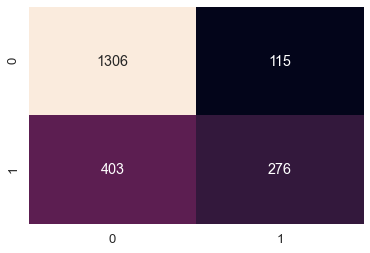

In [418]:
sns.heatmap(confusion_matrix(y_train,ytrain_predict),annot=True,fmt='d',cbar=False)

In [395]:
nn_train_acc=best_grid.score(X_train,y_train) 
nn_train_acc

0.7533333333333333

In [396]:
print(classification_report(y_train,ytrain_predict))

              precision    recall  f1-score   support

           0       0.76      0.92      0.83      1421
           1       0.71      0.41      0.52       679

    accuracy                           0.75      2100
   macro avg       0.74      0.66      0.68      2100
weighted avg       0.75      0.75      0.73      2100



In [397]:
nn_metrics=classification_report(y_train, ytrain_predict,output_dict=True)
df2=pd.DataFrame(nn_metrics).transpose()
nn_train_precision=round(df2.loc["1"][0],2)
nn_train_recall=round(df2.loc["1"][1],2)
nn_train_f1=round(df2.loc["1"][2],2)
print ('nn_train_precision ',nn_train_precision)
print ('nn_train_recall ',nn_train_recall)
print ('nn_train_f1 ',nn_train_f1)

nn_train_precision  0.71
nn_train_recall  0.41
nn_train_f1  0.52


Area under Curve is 0.7881695667449855


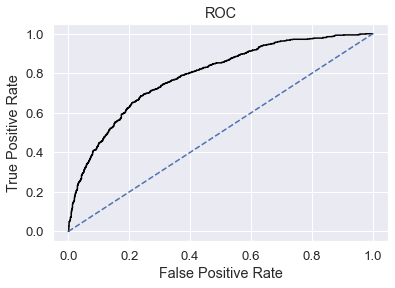

In [398]:
nn_train_fpr, nn_train_tpr,_=roc_curve(y_train,best_grid.predict_proba(X_train)[:,1])
plt.plot(nn_train_fpr,nn_train_tpr,color='black')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
nn_train_auc=roc_auc_score(y_train,best_grid.predict_proba(X_train)[:,1])
print('Area under Curve is', nn_train_auc)

In [415]:
confusion_matrix(y_test,ytest_predict)

array([[262, 393],
       [ 65, 180]], dtype=int64)

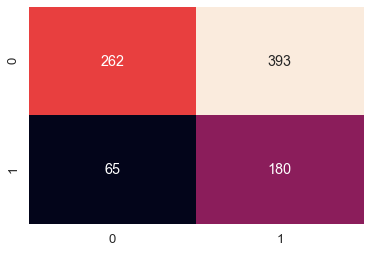

In [417]:
sns.heatmap(confusion_matrix(y_test,ytest_predict),annot=True,fmt='d',cbar=False)

In [400]:
nn_test_acc=best_grid.score(X_test,y_test)
nn_test_acc

0.4911111111111111

In [401]:
print(classification_report(y_test,ytest_predict))

              precision    recall  f1-score   support

           0       0.80      0.40      0.53       655
           1       0.31      0.73      0.44       245

    accuracy                           0.49       900
   macro avg       0.56      0.57      0.49       900
weighted avg       0.67      0.49      0.51       900



In [402]:
nn_metrics=classification_report(y_test, ytest_predict,output_dict=True)
df2=pd.DataFrame(nn_metrics).transpose()
nn_test_precision=round(df2.loc["1"][0],2)
nn_test_recall=round(df2.loc["1"][1],2)
nn_test_f1=round(df2.loc["1"][2],2)
print ('nn_test_precision ',nn_test_precision)
print ('nn_test_recall ',nn_test_recall)
print ('nn_test_f1 ',nn_test_f1)

nn_test_precision  0.31
nn_test_recall  0.73
nn_test_f1  0.44


Area under Curve is 0.6126468297242562


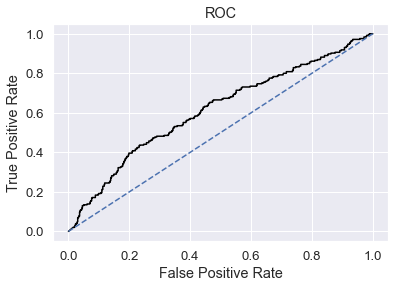

In [403]:
nn_test_fpr, nn_test_tpr,_=roc_curve(y_test,best_grid.predict_proba(X_test)[:,1])
plt.plot(nn_test_fpr,nn_test_tpr,color='black')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
nn_test_auc=roc_auc_score(y_test,best_grid.predict_proba(X_test)[:,1])
print('Area under Curve is', nn_test_auc)

In [404]:
best_grid.score

<bound method ClassifierMixin.score of MLPClassifier(hidden_layer_sizes=50, max_iter=2500, random_state=1, tol=0.01)>

In [293]:
param_grid = {
    'hidden_layer_sizes': [500],
    'max_iter': [10000],
    'solver': ['sgd'],
    'tol': [0.01], 
    'activation': ['relu']
}

nncl = MLPClassifier(random_state=1)

grid_search = GridSearchCV(estimator = nncl, param_grid = param_grid, cv = 10)

In [295]:
grid_search.fit(X_train, y_train)
grid_search.best_params_
#{'hidden_layer_sizes': 100, 'max_iter': 2500, 'solver': 'adam', 'tol': 0.01}

{'activation': 'logistic',
 'hidden_layer_sizes': 500,
 'max_iter': 10000,
 'solver': 'adam',
 'tol': 0.01}

In [296]:
best_grid = grid_search.best_estimator_
best_grid

MLPClassifier(activation='logistic', hidden_layer_sizes=500, max_iter=10000,
              random_state=1, tol=0.01)

In [297]:
ytrain_predict = best_grid.predict(X_train)
ytest_predict = best_grid.predict(X_test)

In [298]:
confusion_matrix(y_train,ytrain_predict)

array([[1290,  131],
       [ 406,  273]], dtype=int64)

In [299]:
nn_train_acc=best_grid.score(X_train,y_train) 
nn_train_acc

0.7442857142857143

In [300]:
print(classification_report(y_train,ytrain_predict))

              precision    recall  f1-score   support

           0       0.76      0.91      0.83      1421
           1       0.68      0.40      0.50       679

    accuracy                           0.74      2100
   macro avg       0.72      0.65      0.67      2100
weighted avg       0.73      0.74      0.72      2100



In [301]:
nn_metrics=classification_report(y_train, ytrain_predict,output_dict=True)
df2=pd.DataFrame(nn_metrics).transpose()
nn_train_precision=round(df2.loc["1"][0],2)
nn_train_recall=round(df2.loc["1"][1],2)
nn_train_f1=round(df2.loc["1"][2],2)
print ('nn_train_precision ',nn_train_precision)
print ('nn_train_recall ',nn_train_recall)
print ('nn_train_f1 ',nn_train_f1)

nn_train_precision  0.68
nn_train_recall  0.4
nn_train_f1  0.5


Area under Curve is 0.7712852344228535


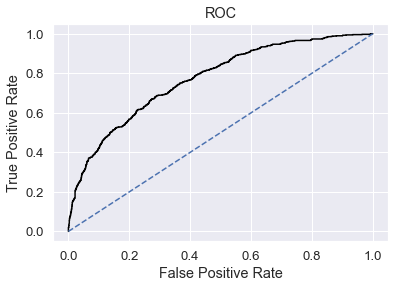

In [303]:
nn_train_fpr, nn_train_tpr,_=roc_curve(y_train,best_grid.predict_proba(X_train)[:,1])
plt.plot(nn_train_fpr,nn_train_tpr,color='black')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
nn_train_auc=roc_auc_score(y_train,best_grid.predict_proba(X_train)[:,1])
print('Area under Curve is', nn_train_auc)

In [304]:
confusion_matrix(y_test,ytest_predict)

array([[613,  42],
       [143, 102]], dtype=int64)

In [305]:
nn_test_acc=best_grid.score(X_test,y_test)
nn_test_acc

0.7944444444444444

In [306]:
print(classification_report(y_test,ytest_predict))

              precision    recall  f1-score   support

           0       0.81      0.94      0.87       655
           1       0.71      0.42      0.52       245

    accuracy                           0.79       900
   macro avg       0.76      0.68      0.70       900
weighted avg       0.78      0.79      0.78       900



In [307]:
nn_metrics=classification_report(y_test, ytest_predict,output_dict=True)
df2=pd.DataFrame(nn_metrics).transpose()
nn_test_precision=round(df2.loc["1"][0],2)
nn_test_recall=round(df2.loc["1"][1],2)
nn_test_f1=round(df2.loc["1"][2],2)
print ('nn_test_precision ',nn_test_precision)
print ('nn_test_recall ',nn_test_recall)
print ('nn_test_f1 ',nn_test_f1)

nn_test_precision  0.71
nn_test_recall  0.42
nn_test_f1  0.52


Area under Curve is 0.7791244742171678


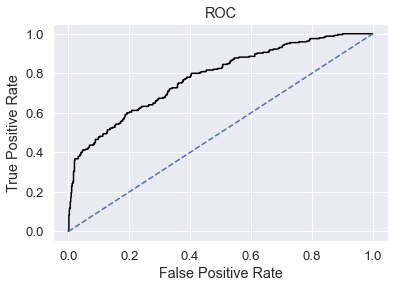

In [309]:
nn_test_fpr, nn_test_tpr,_=roc_curve(y_test,best_grid.predict_proba(X_test)[:,1])
plt.plot(nn_test_fpr,nn_test_tpr,color='black')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
nn_test_auc=roc_auc_score(y_test,best_grid.predict_proba(X_test)[:,1])
print('Area under Curve is', nn_test_auc)

In [310]:
best_grid.score

<bound method ClassifierMixin.score of MLPClassifier(activation='logistic', hidden_layer_sizes=500, max_iter=10000,
              random_state=1, tol=0.01)>

# Neural Network Conclusion

On Non-scaled data:

<b>Train Data:</b>  
    AUC: 77.1%        
    Accuracy: 74%          
    Precision: 68%        
    f1-Score: 50%     
            
<b>Test Data:</b>      
    AUC: 77.9%      
    Accuracy: 79%        
    Precision: 71%       
    f1-Score: 52%     
  
Training and Test set results are almost similar, and with the overall measures high, the model is a good model.

On Scaled data:

<b>Train Data:</b>  
    AUC: 77.9%        
    Accuracy: 75%          
    Precision: 70%        
    f1-Score: 51%     
            
<b>Test Data:</b>      
    AUC: 72%      
    Accuracy: 79%        
    Precision: 71%       
    f1-Score: 52%  


# Final Conclusion

## Comparison of the performance metrics from the 3 models

In [363]:
index=['Accuracy', 'AUC', 'Recall','Precision','F1 Score']
data = pd.DataFrame({'CART Train':[cart_train_acc,cart_train_auc,cart_train_recall,cart_train_precision,cart_train_f1],
        'CART Test':[cart_test_acc,cart_test_auc,cart_test_recall,cart_test_precision,cart_test_f1],
       'Random Forest Train':[rf_train_acc,rf_train_auc,rf_train_recall,rf_train_precision,rf_train_f1],
        'Random Forest Test':[rf_test_acc,rf_test_auc,rf_test_recall,rf_test_precision,rf_test_f1],
       'Neural Network Train':[nn_train_acc,nn_train_auc,nn_train_recall,nn_train_precision,nn_train_f1],
        'Neural Network Test':[nn_test_acc,nn_test_auc,nn_test_recall,nn_test_precision,nn_test_f1]},index=index)
round(data,2)

,CART Train,CART Test,Random Forest Train,Random Forest Test,Neural Network Train,Neural Network Test
Accuracy,0.78,0.78,0.78,0.80,0.75,0.38
AUC,0.84,0.81,0.84,0.82,0.78,0.72
Recall,0.64,0.57,0.57,0.50,0.40,0.98
Precision,0.66,0.60,0.71,0.67,0.70,0.30
F1 Score,0.65,0.59,0.63,0.57,0.51,0.46


## ROC Curve for the 3 models on the Training data

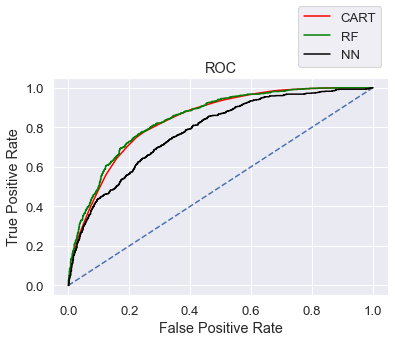

In [364]:
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(cart_train_fpr, cart_train_tpr,color='red',label="CART")
plt.plot(rf_train_fpr,rf_train_tpr,color='green',label="RF")
plt.plot(nn_train_fpr,nn_train_tpr,color='black',label="NN")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower right')

## ROC Curve for the 3 models on the Test data

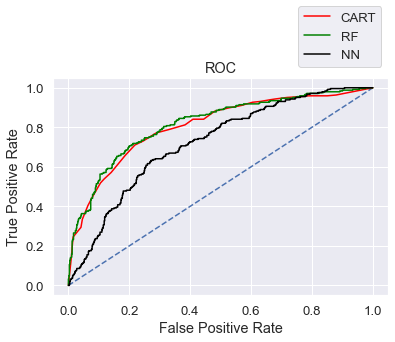

In [365]:
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(cart_test_fpr, cart_test_tpr,color='red',label="CART")
plt.plot(rf_test_fpr,rf_test_tpr,color='green',label="RF")
plt.plot(nn_test_fpr,nn_test_tpr,color='black',label="NN")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower right')

Out of the 3 models, Random Forest has slightly better performance than the Cart and Neural network model

Overall all the 3 models are reasonaly stable enough to be used for making any future predictions.
From Cart and Random Forest Model, the variable Product Name is found to be the most useful feature amongst all other features for predicting if a person has diabetes or not. If change is yes, then those patients have more chances of getting diabetes.